This first week of the supervised part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of gradient descent by hand. Later, we will off course just use sklearn SGDRegressor for this.

Download and load the file housing-data.txt, which you can find on assemblix2019 (/data/datasets/DS3/). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes.

Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis).
As we have discussed, the general formula for the cost of a model is as follows:

 

Write a function compute_cost that receives a matrix X (of size ), a vector y (of size ) and a vector theta (of size ) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original X-matrix
When we call compute-cost with a value of theta of [0,0], the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize .

As we have discussed, the technique we are using for this is gradient descent: every step of this descent, we update the values of theta as follows:

 

Make a function gradient_descent, that receives the matrix X, the vectors y and theta, the learning curve alpha and a num_iters. In this method, performs num_iters steps of the gradient descent, calculating the cost  every step and storing that in a list. After the num_iters, this function needs to return the found value of theta and the list of all the costs.

Create a plot of the values of  that compute_costs has found. Do you see a decrease in the total costs?

#we should normalze data

In [1]:
#loading The required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [5]:
#loading the data
data = pd.read_csv('~/Library/CloudStorage/OneDrive-HanzehogeschoolGroningen/Semester2/MachineLearning/Data/housing-data.txt')

data.head()

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014


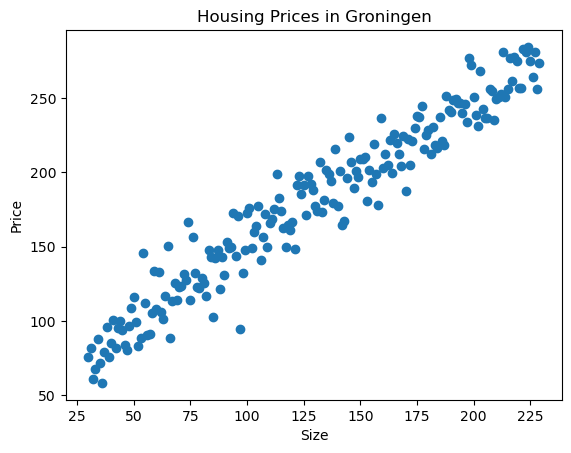

In [6]:
#plotting the data
plt.scatter(data['size'], data['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Housing Prices in Groningen')
plt.show()

In [16]:
# Normalize the size feature
data['size'] = (data['size'] - data['size'].mean()) / data['size'].std()

# Define X (input) and y (output)
X = data[['intercept', 'size']].values
y = data['price'].values

In [19]:
def compute_cost(X, y, theta):
    """
    Compute the mean squared error cost.

    Parameters:
    X (numpy.ndarray): Input data, where rows are examples and columns are features.
    y (numpy.ndarray): Vector of target values.
    theta (numpy.ndarray): Vector of parameters for the linear regression model.

    Returns:
    float: The mean squared error cost.
    """
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2
    return 1/(2*m) * np.sum(square_err)



In [20]:

def gradient_descent(X, y, theta, alpha, num_iters):
    """
    Perform gradient descent to learn the model parameters.

    Parameters:
    X (numpy.ndarray): Input data, where rows are examples and columns are features.
    y (numpy.ndarray): Vector of target values.
    theta (numpy.ndarray): Initial vector of parameters for the linear regression model.
    alpha (float): Learning rate.
    num_iters (int): Number of iterations for the gradient descent loop.

    Returns:
    numpy.ndarray: The final vector of parameters for the linear regression model.
    numpy.ndarray: The history of the cost function for each iteration.
    numpy.ndarray: The history of theta parameters for each iteration.
    """
    m = len(y)
    cost_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters,2))

    for i in range(num_iters):
        prediction = np.dot(X, theta)
        theta = theta - alpha * (1/m) * (X.T.dot((prediction - y)))
        theta_history[i,:] = theta.T
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history, theta_history

In [21]:
# Initialize theta to zeros
theta = np.array([0.0, 0.0])

# Define learning rate and number of iterations
alpha = 0.001
num_iters = 1000

# Run gradient descent
theta, cost_history, theta_history = gradient_descent(X, y, theta, alpha, num_iters)

# Output final theta values
print('Final value of theta =', theta)


Final value of theta = [113.54741501  35.81537798]


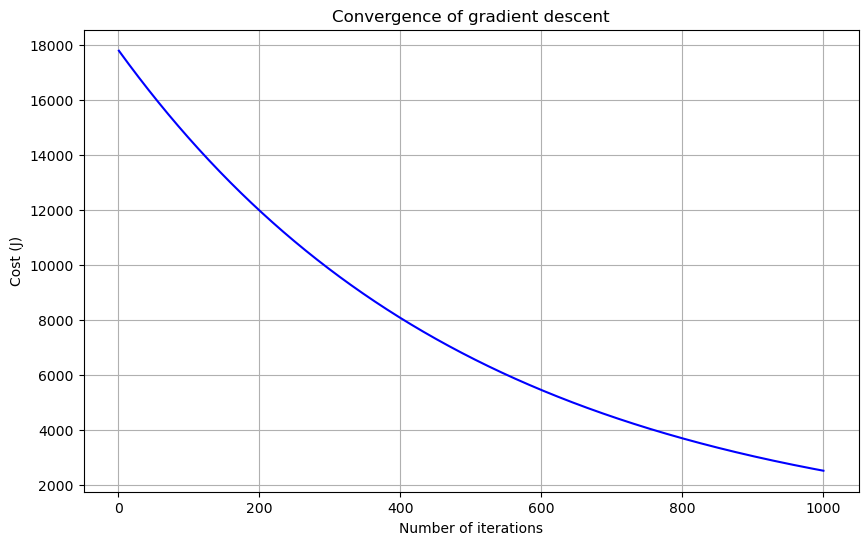

In [22]:

# Plot the cost history
plt.plot(range(1, num_iters + 1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()